In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('intern_car_regg.csv')
df.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370 000 km,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168 636 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120 873 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [4]:
new_names = {"Avtosalon":"car_dealership","Qiymet":"price","Valyuta":"currency","Şəhər":"city","Marka":"brand","Model":"model",
             "Buraxılış ili":"release_date",
            "Ban növü":"type_of_ban","Rəng":"color","Mühərrik":"engine","Yürüş":"distance","Sürətlər qutusu":"gearbox",
            "Ötürücü":"gear","Yeni":"is_new","Vəziyyəti":"condition","Yeniləndi":"refreshed","Baxışların sayı":"views",
            "Extra":"extra","Etrafli":"detailed","Sahiblər":"owners","Hansı bazar üçün yığılıb":"market","Yerlərin sayı":"seats",
            "Qəzalı":"car_accident"}

In [5]:
df=df.rename(columns=new_names)

In [6]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           28
refreshed            0
views                0
extra              764
detailed           282
owners            3807
market            3298
seats             3168
car_accident      9968
dtype: int64

<Axes: >

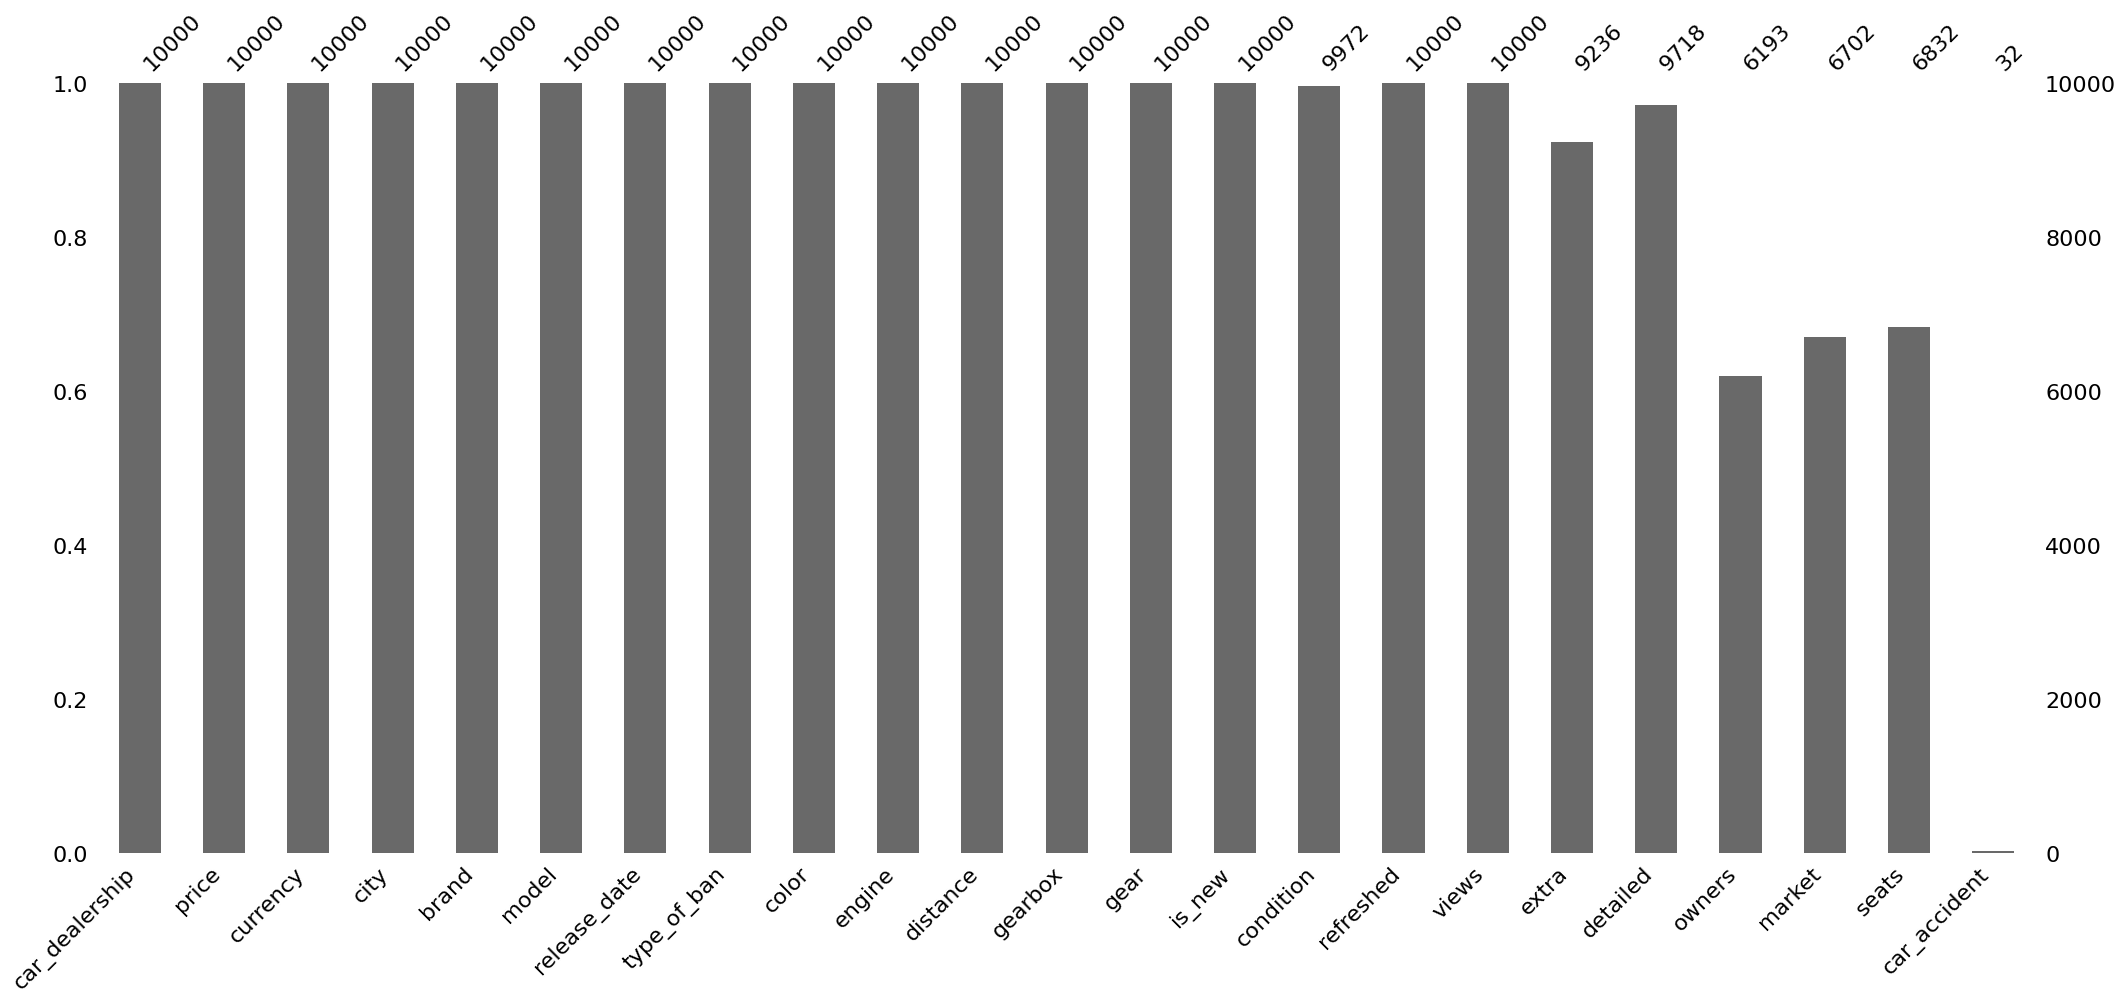

In [7]:
import missingno as msno
msno.bar(df)

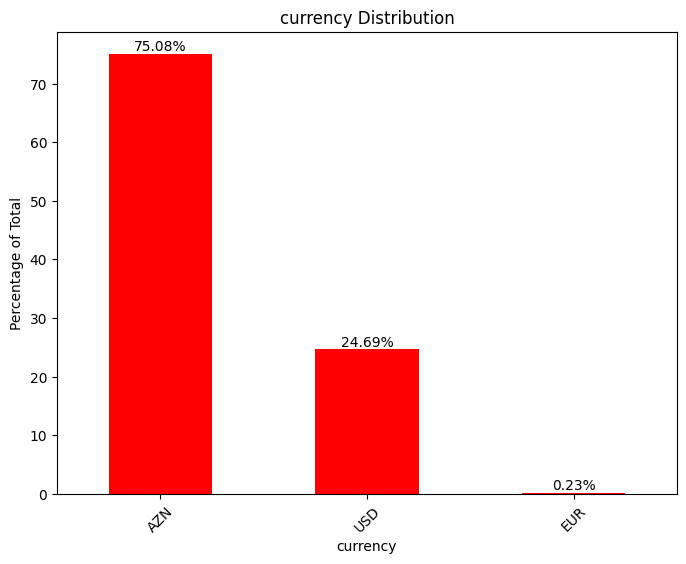

In [8]:
def plot_categorical_percentage(data, column):
    counts = data[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    ax = counts.plot(kind='bar', color='red')

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, i.get_height(), f'{round(i.get_height(), 2)}%', ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel('Percentage of Total')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()
plot_categorical_percentage(df, 'currency')


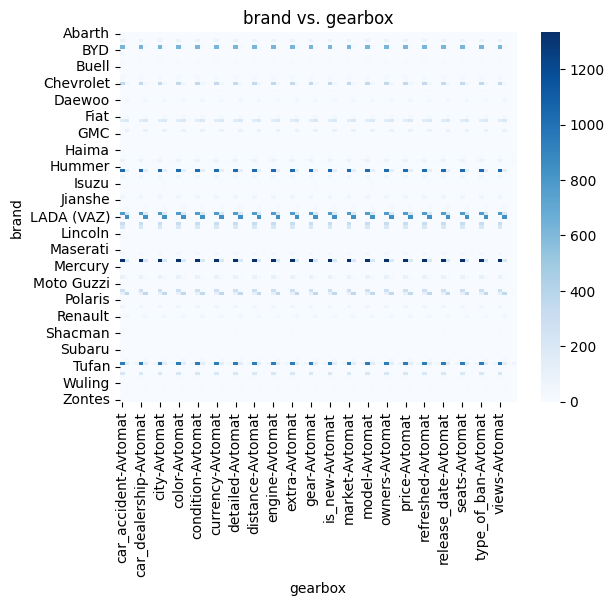

In [9]:
pivot_table = df.pivot_table(index='brand', columns='gearbox', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, cmap='Blues')
plt.xlabel('gearbox')
plt.ylabel('brand')
plt.title('brand vs. gearbox')
plt.show()

### Changing price according currency

In [10]:
df['price'] = df['price'].astype(float)

In [11]:
df.loc[df['currency']=='USD',['price']]=df.loc[df['currency']=='USD',['price']].apply(lambda x:x*1.7)
df.loc[df['currency']=='EUR',['price']]=df.loc[df['currency']=='EUR',['price']].apply(lambda x:x*1.84)

###  Filling nan  seats according type_of_ban

In [12]:
df['seats'].isnull().value_counts()

seats
False    6832
True     3168
Name: count, dtype: int64

In [13]:
df[df['seats'].isnull()][["type_of_ban"]].value_counts()

type_of_ban    
Sedan              1554
Offroader / SUV     829
Hetçbek             242
Universal           148
Liftbek             114
Yük maşını           90
Furqon               50
Dartqı               28
Minivan              23
Pikap                23
Motosiklet           21
Kupe                 16
Mikroavtobus         13
Avtobus               8
Rodster               3
Kabriolet             2
Van                   2
Moped                 2
Name: count, dtype: int64

In [14]:
df.loc[df["type_of_ban"]=="Sedan",["seats"]].value_counts() # 5 is most frequent seat 

seats
5        2294
4         522
2           8
6           5
3           4
1           2
7           2
Name: count, dtype: int64

In [15]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Sedan"),['seats'] ] = "5"

In [16]:
#Let's check if the sedans which have different number of seat are correct
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
6767,Volkswagen,Passat
6910,Mercedes,C 180


In [17]:
df.iloc[[6767, 6910], df.columns.get_loc('seats')]=5

In [18]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
645,Mercedes,E 320
1042,Mercedes,E 220
3830,Mercedes,190
5197,LADA (VAZ),2107
5200,Opel,Vectra
6609,LADA (VAZ),2115
8443,Daewoo,Leganza
9289,Mercedes,E 240


In [19]:
df.iloc[[645,1042,3830,5197,5200,6609,8443,9289], df.columns.get_loc('seats')]="5"

In [20]:
df.loc[(df["seats"]=="3") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
94,Kia,Magentis
2504,Mercedes,E 270
3171,LADA (VAZ),2107
7117,Mercedes,C 230


In [21]:
df.iloc[[94,2504,3171,7117], df.columns.get_loc('seats')]="5"

In [22]:
df.loc[df["type_of_ban"]=="Offroader / SUV",["seats"]].value_counts()

seats
7        1105
5        1094
4          88
6          19
8+          5
2           2
1           1
Name: count, dtype: int64

In [23]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Offroader / SUV"),["seats"] ] ="7"

In [24]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Offroader / SUV"),["seats"]]="8"

In [25]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Offroader / SUV"),["brand","model"]]

,brand,model
6013,Ford,Explorer


In [26]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Offroader / SUV"),["brand","model"]]

,brand,model
5828,Mercedes,GL 450
7664,GAZ,66


In [27]:
df.iloc[[6013,5828], df.columns.get_loc('seats')]="7"

In [28]:
df.iloc[[7664], df.columns.get_loc('seats')]="23"

In [29]:
df.loc[df["type_of_ban"]=="Hetçbek",["seats"]].value_counts()

seats
5        450
4         92
6          2
1          1
2          1
7          1
Name: count, dtype: int64

In [30]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Hetçbek"),["seats"] ] ="5"

In [31]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Hetçbek"),["brand","model"]]

,brand,model
3798,Opel,Astra


In [32]:
df.iloc[[3798], df.columns.get_loc('seats')]="5"

In [33]:
df.loc[(df["seats"]=="6") & (df["type_of_ban"]=="Hetçbek"),["brand","model"]]

,brand,model
8309,Chevrolet,Aveo
9014,Opel,Astra


In [34]:
df.iloc[[8309,9014], df.columns.get_loc('seats')]="5"

In [36]:
df.loc[df["type_of_ban"]=="Universal",["seats"]].value_counts()

seats
5        444
4         41
7         12
6          2
Name: count, dtype: int64

In [35]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Universal"),["seats"] ] ="5"

In [37]:
df.loc[df["type_of_ban"]=="Liftbek",["seats"]].value_counts()

seats
5        162
4         42
2          1
7          1
Name: count, dtype: int64

In [38]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Liftbek"),["seats"] ] ="5"

In [39]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Liftbek"),["brand","model","release_date"]]

,brand,model,release_date
7777,Toyota,Prius,2009


In [40]:
df.iloc[[7777], df.columns.get_loc('seats')]="5"

In [41]:
df.loc[df["type_of_ban"]=="Yük maşını",["seats"]].value_counts()

seats
3        88
2        36
6         4
5         3
4         2
1         1
7         1
8+        1
Name: count, dtype: int64

In [42]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Yük maşını"),["seats"] ] ="3"

In [43]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Yük maşını"),["brand","model","release_date"]]

,brand,model,release_date
9119,KamAz,65115,2008


In [44]:
df.iloc[[9119], df.columns.get_loc('seats')]="3"

In [45]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Yük maşını"),["brand","model","release_date"]]

,brand,model,release_date
9829,Mercedes,Axor 1829,2009


In [46]:
df.iloc[[9829], df.columns.get_loc('seats')]="3"

In [47]:
df.loc[df["type_of_ban"]=="Furqon",["seats"]].value_counts()

seats
3        80
2        22
5         5
4         4
8+        2
1         1
6         1
7         1
Name: count, dtype: int64

In [48]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Furqon"),["seats"] ] ="3"

In [49]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Furqon"),["brand","model","release_date"]]

,brand,model,release_date
1703,Ford,Transit,2000
4931,Ford,Transit,1999


In [50]:
df.iloc[[1703,4931], df.columns.get_loc('seats')]="12"

In [51]:
df.iloc[[2809], df.columns.get_loc('seats')]="8"

In [52]:
df.loc[df["type_of_ban"]=="Dartqı",["seats"]].value_counts()

seats
2        19
3         6
4         3
Name: count, dtype: int64

In [53]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Dartqı"),["seats"] ] ="2"

In [54]:
df.loc[df["type_of_ban"]=="Pikap",["seats"]].value_counts()

seats
5        20
2         2
4         2
6         2
Name: count, dtype: int64

In [55]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Pikap"),["seats"] ] ="5"

In [56]:
df.iloc[[1409,7916], df.columns.get_loc('seats')]="4"

In [57]:
df.loc[df["type_of_ban"]=="Minivan",["seats"]].value_counts()

seats
7        66
8+       40
5        35
3         5
6         5
4         3
Name: count, dtype: int64

In [58]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Minivan"),["brand","model","release_date"]]

,brand,model,release_date
348,Kia,Carnival,2011
527,Kia,Carnival,2016
529,Kia,Carnival,2015
1217,Mercedes,Vito,2008
1232,Mercedes,Vito 114,2016
1295,Mercedes,Vito 115,2012
1297,Kia,Carnival,2016
1730,Mercedes,Vito 111,2009
1926,Hyundai,H-1,2017
2040,Hyundai,H-1,2014


In [59]:
#getdi Hyundai H1,Kia carnival,mercedes vito,fiat scudo,Toyota	Sienna ,Ford	Transit

In [101]:
df.iloc[[1926,2040,3700,5738,5771,6167,7567], df.columns.get_loc('seats')]="12"

In [102]:
df.iloc[[348,529,1297,6146,6508,8061,8750,8827,8865,9847,527], df.columns.get_loc('seats')]="8"

In [103]:
df.iloc[[1217,1232,1295,1730,3019,4348,4689,4956,5049,6189,7207,8005,8252,8301,9381,9485], df.columns.get_loc('seats')]="8"

In [104]:
df.iloc[[2596], df.columns.get_loc('seats')]="9"

In [105]:
df.iloc[[6242,8347], df.columns.get_loc('seats')]="8"

In [106]:
df.iloc[[2940,8496], df.columns.get_loc('seats')]="12"

In [107]:
df.iloc[[5270], df.columns.get_loc('seats')]="11"

In [67]:
df.loc[df["type_of_ban"]=="Minivan",["seats"]].value_counts()

seats
7        66
5        35
8        28
12        8
3         5
6         5
4         3
8+        2
11        1
9         1
Name: count, dtype: int64

In [68]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Minivan"),["seats"] ] ="7"

In [69]:
df.loc[df["type_of_ban"]=="Motosiklet",["seats"]].value_counts()

seats
2        16
1        13
5         1
Name: count, dtype: int64

In [70]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Motosiklet"),["seats"] ] ="2"

In [71]:
df.loc[(df["seats"]=="5") & (df["type_of_ban"]=="Motosiklet"),["brand","model","release_date"]]

,brand,model,release_date
7046,Tufan,Istiqlal,2020


In [72]:
df.iloc[[7046], df.columns.get_loc('seats')]="2"

In [73]:
df.loc[df["type_of_ban"]=="Kupe",["seats"]].value_counts()

seats
4        27
5        12
2         2
Name: count, dtype: int64

In [74]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Kupe"),["seats"] ] ="4"

In [75]:
df.loc[df["type_of_ban"]=="Mikroavtobus",["seats"]].value_counts()

seats
8+       18
7         3
3         1
Name: count, dtype: int64

In [76]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Mikroavtobus"),["brand","model","release_date"]]

,brand,model,release_date
215,Ford,Transit,1994
369,Mercedes,Sprinter 316,2010
1592,Ford,Transit,1998
1887,Mercedes,208 D,1992
2032,Mercedes,208 D,1994
2074,Mercedes,208 D,1991
2946,Mercedes,Vito 115,2006
3157,ZIL,5301,1999
3359,Mercedes,Sprinter 524,2008
3994,Mercedes,208 D,1987


In [77]:
#getdi Mercedes	208 D,Mercedes	Sprinter,Ford	Transit	1994,Kia	Pregio	2004,Volkswagen	Crafter	2009

In [109]:
df.iloc[[1887,2032,2074,3994,4085,2946], df.columns.get_loc('seats')]="9"

In [79]:
df.iloc[[369,3359,4717,9864], df.columns.get_loc('seats')]="3"

In [80]:
df.iloc[[215,1592,8043,8892], df.columns.get_loc('seats')]="17"

In [81]:
df.iloc[[5758,7444], df.columns.get_loc('seats')]="12"

In [82]:
df.iloc[[6720,3157], df.columns.get_loc('seats')]="3"

In [83]:
df.loc[df["type_of_ban"]=="Mikroavtobus",["seats"]].value_counts()

seats
3        7
9        5
17       4
7        3
12       2
8+       1
Name: count, dtype: int64

In [84]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Mikroavtobus"),["seats"] ] ="3"

In [85]:
df.loc[df["type_of_ban"]=="Avtobus",["seats"]].value_counts()

seats
8+       4
Name: count, dtype: int64

In [86]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Avtobus"),["brand","model","release_date"]]

,brand,model,release_date
6845,Isuzu,Ecobus,2011
7623,Hyundai,County,1998
8095,Mitsubishi,Prenses,1996
8809,Hyundai,Chorus,2007


In [87]:
df.iloc[[6845], df.columns.get_loc('seats')]="25"

In [88]:
df.iloc[[7623,8809], df.columns.get_loc('seats')]="20"

In [89]:
df.iloc[[8095], df.columns.get_loc('seats')]="18"

In [90]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Avtobus"),["seats"] ] ="20"

In [91]:
df.loc[df["type_of_ban"]=="Kabriolet",["seats"]].value_counts()

seats
4        5
Name: count, dtype: int64

In [92]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Kabriolet"),["seats"] ] ="4"

In [93]:
df.loc[df["type_of_ban"]=="Rodster",["seats"]].value_counts()

seats
2        4
Name: count, dtype: int64

In [94]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Rodster"),["seats"] ] = "2"

In [95]:
df.loc[df["type_of_ban"]=="Moped",["seats",'brand','model']]

,seats,brand,model
874,NaN,Tufan,CUB50 S
899,NaN,Tufan,M50


In [96]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Moped"),["seats"] ] = "2"

In [97]:
df.loc[df["type_of_ban"]=="Van",["seats","brand","model"]]

,seats,brand,model
366,3,Mercedes,Vito
1150,3,Ford,Transit
1966,8+,Mercedes,Vito
2186,3,Mercedes,Vito 115
3960,8+,Mercedes,Vito
4774,8+,DFSK,C-37
5065,8+,Mercedes,Vito 111
5157,7,Mercedes,Viano
5586,NaN,Mercedes,Vito 115
5643,NaN,Mercedes,Vito


In [98]:
df.iloc[[336,1150,1966,2186,3960,4774,5065,5157,5586,5643,9859], df.columns.get_loc('seats')]="8"

<Axes: >

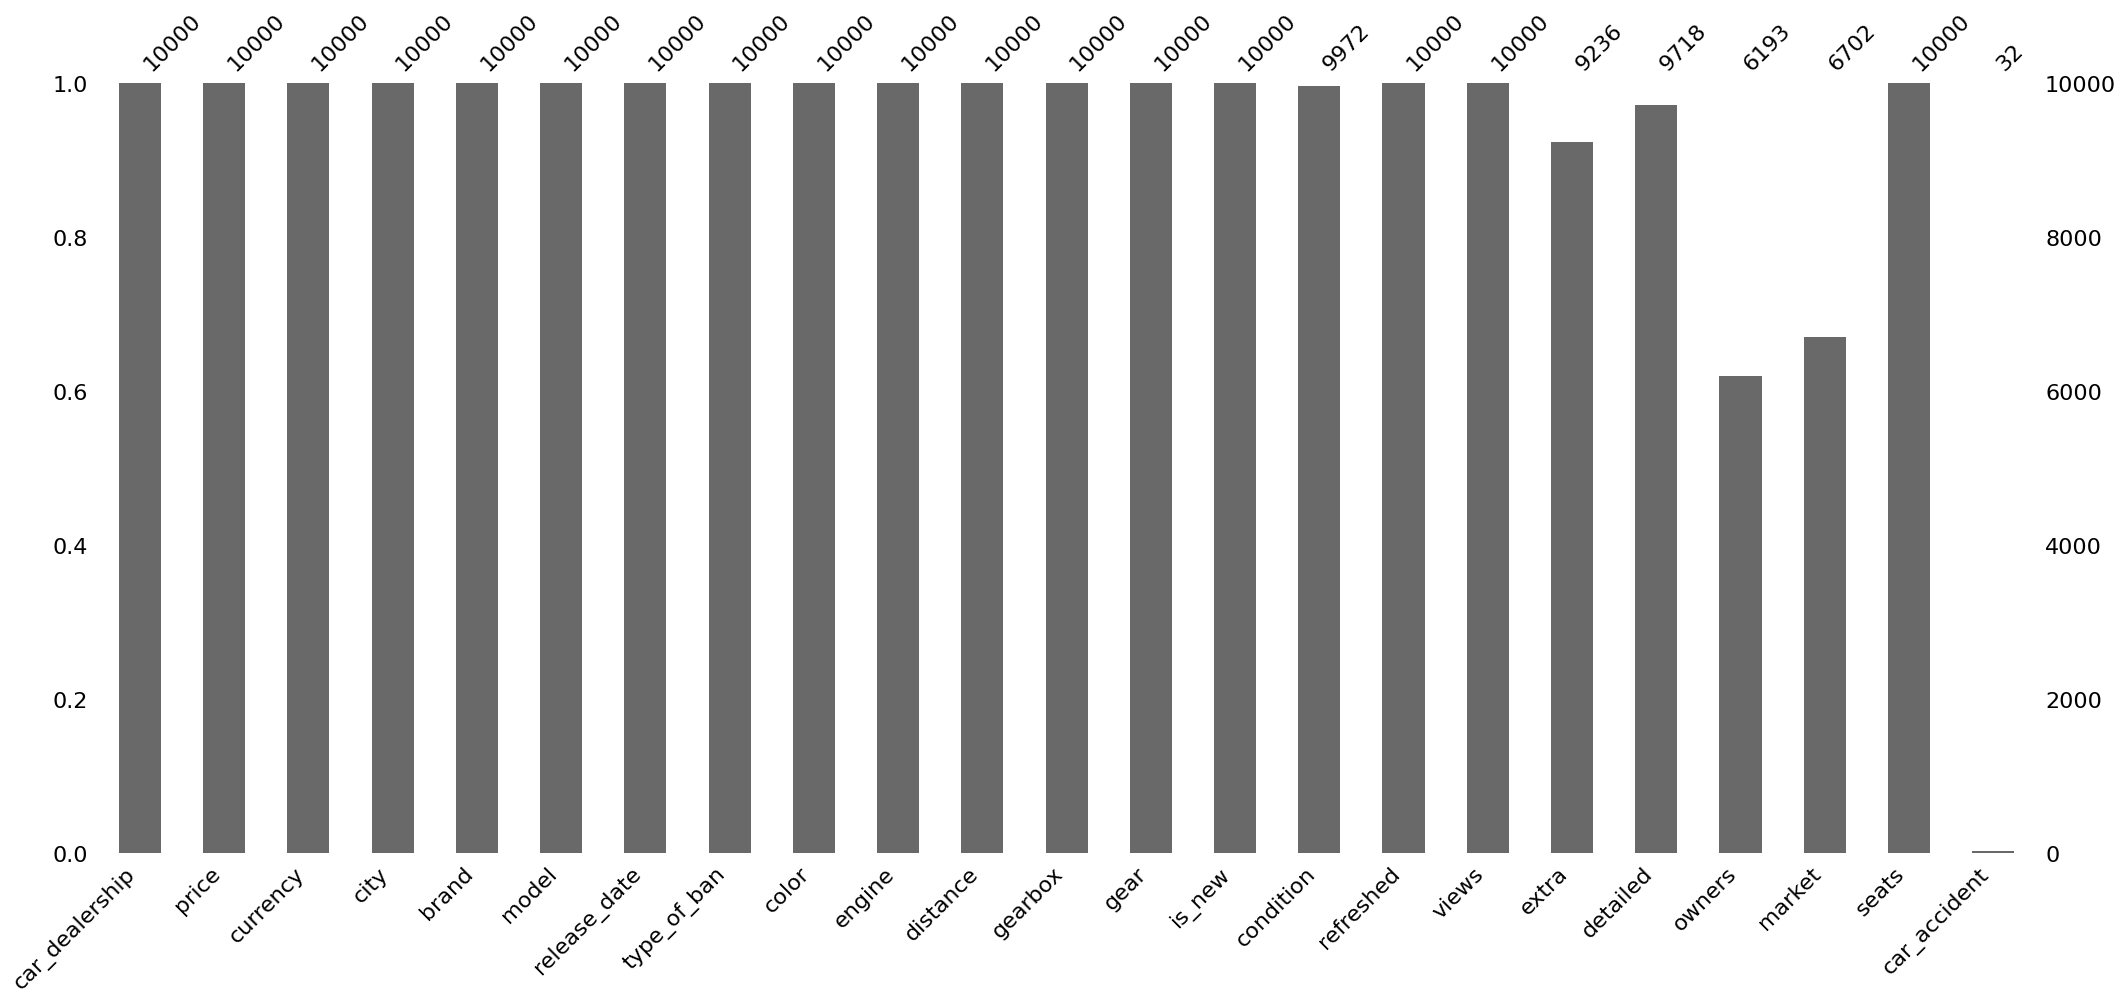

In [99]:
msno.bar(df)

In [110]:
df.loc[df["seats"]=="8+",["brand","model","type_of_ban"]]

,brand,model,type_of_ban


In [111]:
df['seats'].value_counts()

seats
5     6467
7     2046
4      851
3      342
2      157
8       46
6       38
1       13
12      13
20      10
9        7
17       4
5        2
11       1
25       1
23       1
18       1
Name: count, dtype: int64

In [112]:
df["market"].value_counts()

market
Avropa         2087
Rəsmi diler    1447
Amerika        1311
Koreya          697
Rusiya          497
Digər           381
Yaponiya        203
Dubay            79
Name: count, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_dealership  10000 non-null  int64  
 1   price           10000 non-null  float64
 2   currency        10000 non-null  object 
 3   city            10000 non-null  object 
 4   brand           10000 non-null  object 
 5   model           10000 non-null  object 
 6   release_date    10000 non-null  int64  
 7   type_of_ban     10000 non-null  object 
 8   color           10000 non-null  object 
 9   engine          10000 non-null  object 
 10  distance        10000 non-null  object 
 11  gearbox         10000 non-null  object 
 12  gear            10000 non-null  object 
 13  is_new          10000 non-null  object 
 14  condition       9972 non-null   object 
 15  refreshed       10000 non-null  object 
 16  views           10000 non-null  int64  
 17  extra           9236 non-null   

### Filling na market values  with same brand same model cars' market values

In [115]:
market_mapping = df.groupby(['brand', 'model'])['market'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
market_mapping.head()

brand       model
Abarth      595          Amerika
Alfa Romeo  159           Avropa
            4C       Rəsmi diler
            GT            Avropa
Audi        A4           Amerika
Name: market, dtype: object

In [116]:
def fill_market(row):
    if pd.isnull(row['market']):
        return market_mapping.get((row['brand'], row['model']), row['market'])
    else:
        return row['market']

In [117]:
df['market'] = df.apply(fill_market, axis=1)


In [118]:
df["market"].value_counts()

market
Avropa         3288
Amerika        1999
Rəsmi diler    1931
Koreya          919
Rusiya          834
Digər           447
Yaponiya        249
Dubay            79
Name: count, dtype: int64

<Axes: >

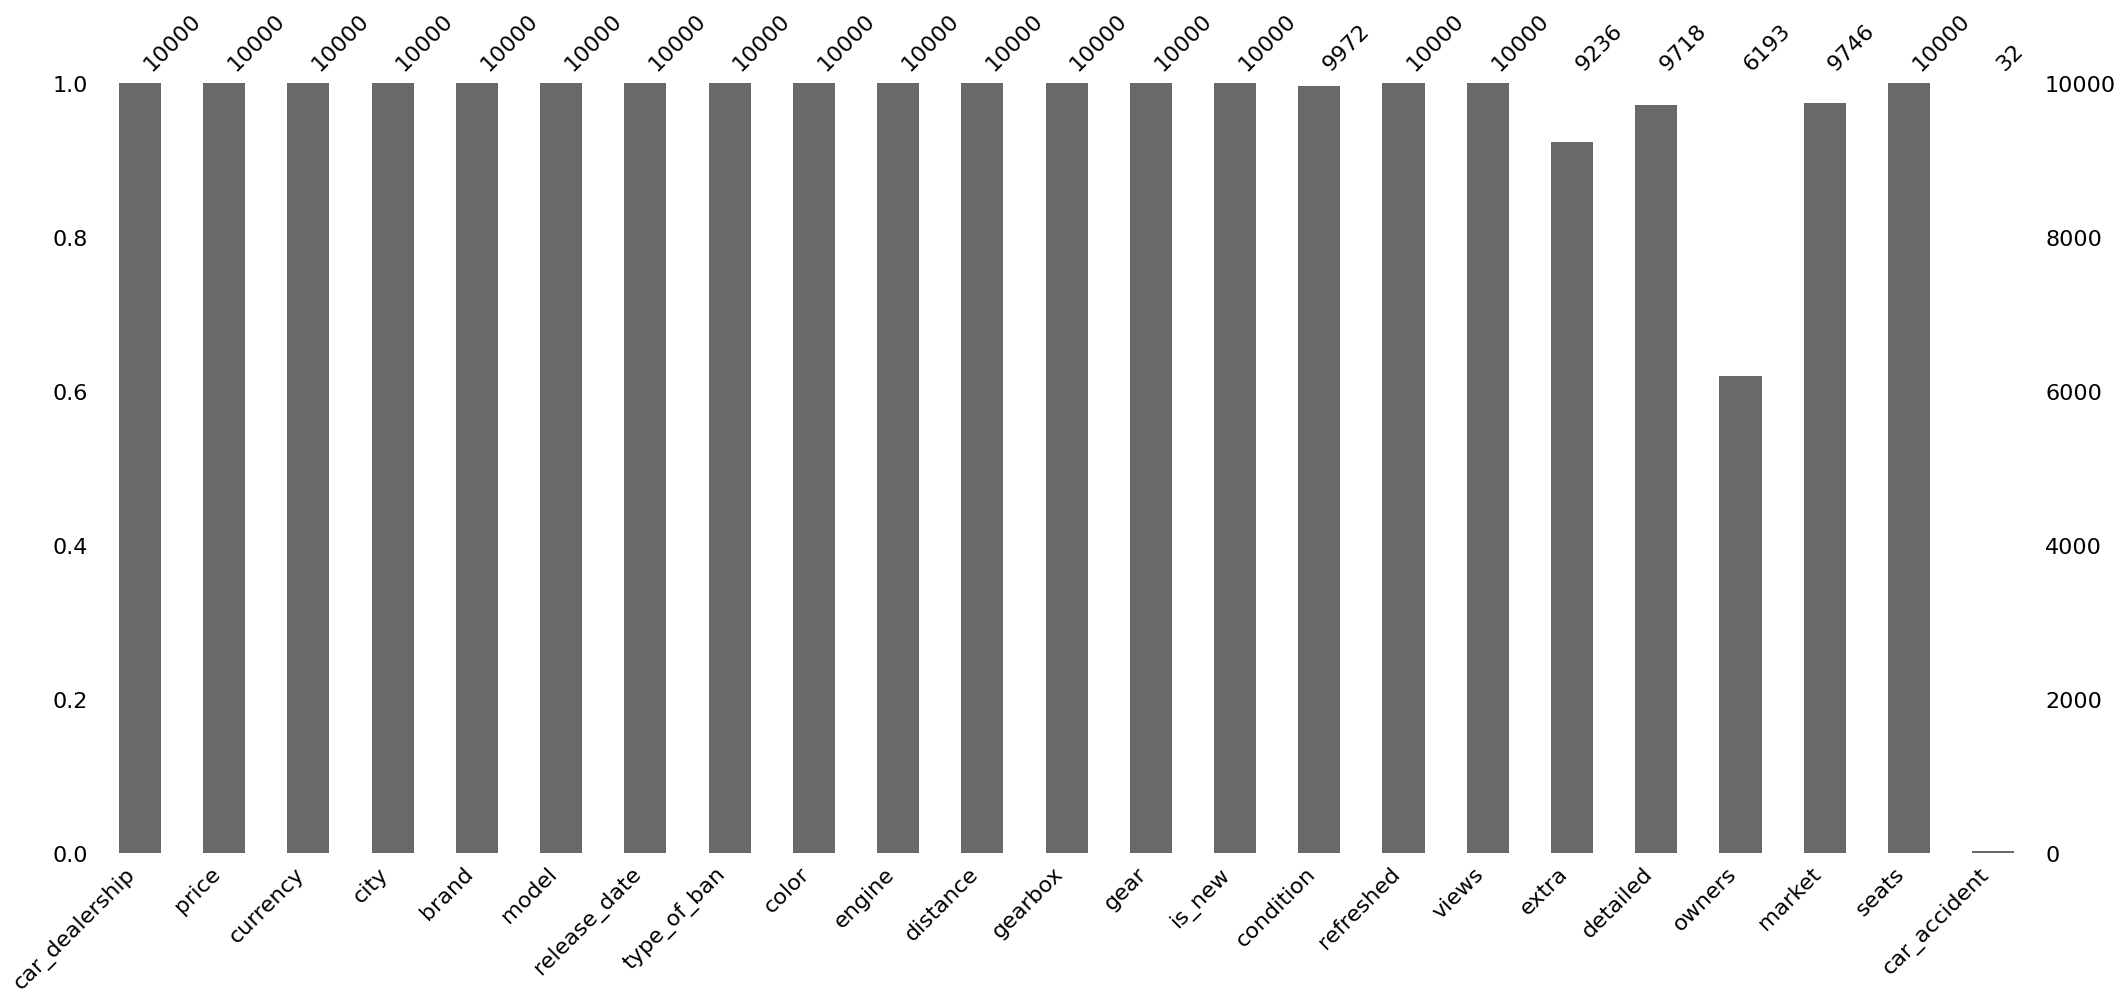

In [119]:
msno.bar(df)

In [120]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           28
refreshed            0
views                0
extra              764
detailed           282
owners            3807
market             254
seats                0
car_accident      9968
dtype: int64

In [121]:
most_frequent_market = df['market'].mode()[0]  # Calculate the most frequent value
df['market'].fillna(most_frequent_market, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6644\3028270211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['market'].fillna(most_frequent_market, inplace=True)


### Filling extra na values with same brand model extra values.

In [122]:
extra_mapping = df.groupby(['brand', 'model'])['extra'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
extra_mapping.head()

brand       model
Abarth      595      Yüngül lehimli disklər, ABS, Lyuk, Mərkəzi qap...
Alfa Romeo  159      Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...
            4C       Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...
            GT       Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...
Audi        A4       Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
Name: extra, dtype: object

In [123]:
def fill_market(row):
    if pd.isnull(row['extra']):
        return extra_mapping.get((row['brand'], row['model']), row['extra'])
    else:
        return row['extra']
df['extra'] = df.apply(fill_market, axis=1)


In [124]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           28
refreshed            0
views                0
extra               89
detailed           282
owners            3807
market               0
seats                0
car_accident      9968
dtype: int64

In [125]:
most_frequent_extra = df['extra'].mode()[0]  
df['extra'].fillna(most_frequent_extra, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6644\4211008534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['extra'].fillna(most_frequent_extra, inplace=True)


In [126]:
df['distance'] = pd.to_numeric(df['distance'].str.replace(' km', '').str.replace(' ', ''))

In [127]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           28
refreshed            0
views                0
extra                0
detailed           282
owners            3807
market               0
seats                0
car_accident      9968
dtype: int64

In [128]:
most_frequent_owner = df['owners'].mode()[0]  
df.fillna({"owners": most_frequent_owner}, inplace=True)

In [129]:
most_frequent_condition = df['condition'].mode()[0]  
df.fillna({"condition": most_frequent_condition}, inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_dealership  10000 non-null  int64  
 1   price           10000 non-null  float64
 2   currency        10000 non-null  object 
 3   city            10000 non-null  object 
 4   brand           10000 non-null  object 
 5   model           10000 non-null  object 
 6   release_date    10000 non-null  int64  
 7   type_of_ban     10000 non-null  object 
 8   color           10000 non-null  object 
 9   engine          10000 non-null  object 
 10  distance        10000 non-null  int64  
 11  gearbox         10000 non-null  object 
 12  gear            10000 non-null  object 
 13  is_new          10000 non-null  object 
 14  condition       10000 non-null  object 
 15  refreshed       10000 non-null  object 
 16  views           10000 non-null  int64  
 17  extra           10000 non-null  

### If it has more than 0 owner then the car is not new.

In [131]:
df.loc[(df["owners"]!="0") & (df["is_new"]!="Xeyr"),["is_new"]]="Xeyr"

### Feature engineering preprocessing

In [132]:
df_features = df.copy()

In [133]:
extra_column_names= df_features['extra'].value_counts().index[0].split(", ")
for col in extra_column_names:
    df_features[col] = df_features['extra'].apply(lambda x: 1 if col in str(x) else 0)

In [134]:
df_features.drop("extra",axis=1,inplace = True)

In [135]:
def split_engine(value):
    parts = value.split('/')
    part1 = parts[0].strip().split()[0] if len(parts) > 0 else None 
    part2 = parts[1].strip().split()[0] if len(parts) > 1 else None 
    part3 = parts[2].strip() if len(parts) > 2 else None             
    return part1, part2, part3

df_features[['engine_power', 'horsepower', 'fuel']] = df_features['engine'].apply(split_engine).apply(pd.Series)
df_features['engine_power'] = pd.to_numeric(df_features['engine_power'], errors='coerce').astype(int)
df_features['horsepower'] = pd.to_numeric(df_features['horsepower'], errors='coerce').astype(int)


df_features.head()


,car_dealership,price,currency,city,brand,model,release_date,type_of_ban,color,engine,distance,gearbox,gear,is_new,condition,refreshed,views,detailed,owners,market,seats,car_accident,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel
0,0,13500.0,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370000,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN,1,1,0,0,0,0,1,0,1,1,0,1,0,1,101,Benzin
1,1,39950.0,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN,1,1,0,1,1,1,1,1,0,1,1,1,1,1,178,Hibrid
2,0,33200.0,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168636,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,2,184,Dizel
3,0,17000.0,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120873,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,Maşın xanım tərəfindən idarə olunub,1,Amerika,5,NaN,1,1,0,1,1,1,1,0,0,1,1,1,0,1,181,Benzin
4,0,61200.0,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,Rəsmi diler,5,NaN,1,1,0,1,1,1,1,1,1,1,1,0,0,2,173,Benzin


In [136]:
df_features["condition"].value_counts()

condition
Vuruğu yoxdur, rənglənməyib    9185
Vuruğu yoxdur, rənglənib        696
Vuruğu var, rənglənib            73
Vuruğu var, rənglənməyib         46
Name: count, dtype: int64

In [137]:
df_features['condition_1'] = df_features['condition'].apply(lambda x: 1 if 'var' in x else 0)
df_features['condition_2'] = df_features['condition'].apply(lambda x: 0 if 'məyib' in x else 1)

In [138]:
def split_date(value):
    parts = value.split('.') 
    day = parts[0] if len(parts) > 0 else None  
    month = parts[1] if len(parts) > 1 else None  
    year = parts[2] if len(parts) > 2 else None 
    return day, month, year
df_features[['day', 'month', 'year']] = df_features['refreshed'].apply(split_date).apply(pd.Series).astype(int)
df_features.head()


,car_dealership,price,currency,city,brand,model,release_date,type_of_ban,color,engine,distance,gearbox,gear,is_new,condition,refreshed,views,detailed,owners,market,seats,car_accident,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year
0,0,13500.0,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370000,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN,1,1,0,0,0,0,1,0,1,1,0,1,0,1,101,Benzin,0,1,28,5,2023
1,1,39950.0,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN,1,1,0,1,1,1,1,1,0,1,1,1,1,1,178,Hibrid,0,0,28,5,2023
2,0,33200.0,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168636,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,2,184,Dizel,0,0,28,5,2023
3,0,17000.0,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120873,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,Maşın xanım tərəfindən idarə olunub,1,Amerika,5,NaN,1,1,0,1,1,1,1,0,0,1,1,1,0,1,181,Benzin,0,0,25,5,2023
4,0,61200.0,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,Rəsmi diler,5,NaN,1,1,0,1,1,1,1,1,1,1,1,0,0,2,173,Benzin,0,0,28,5,2023


### Dropping some columns

In [139]:
df_features.drop(columns=["currency","engine","condition","refreshed","detailed","car_accident"], inplace=True)

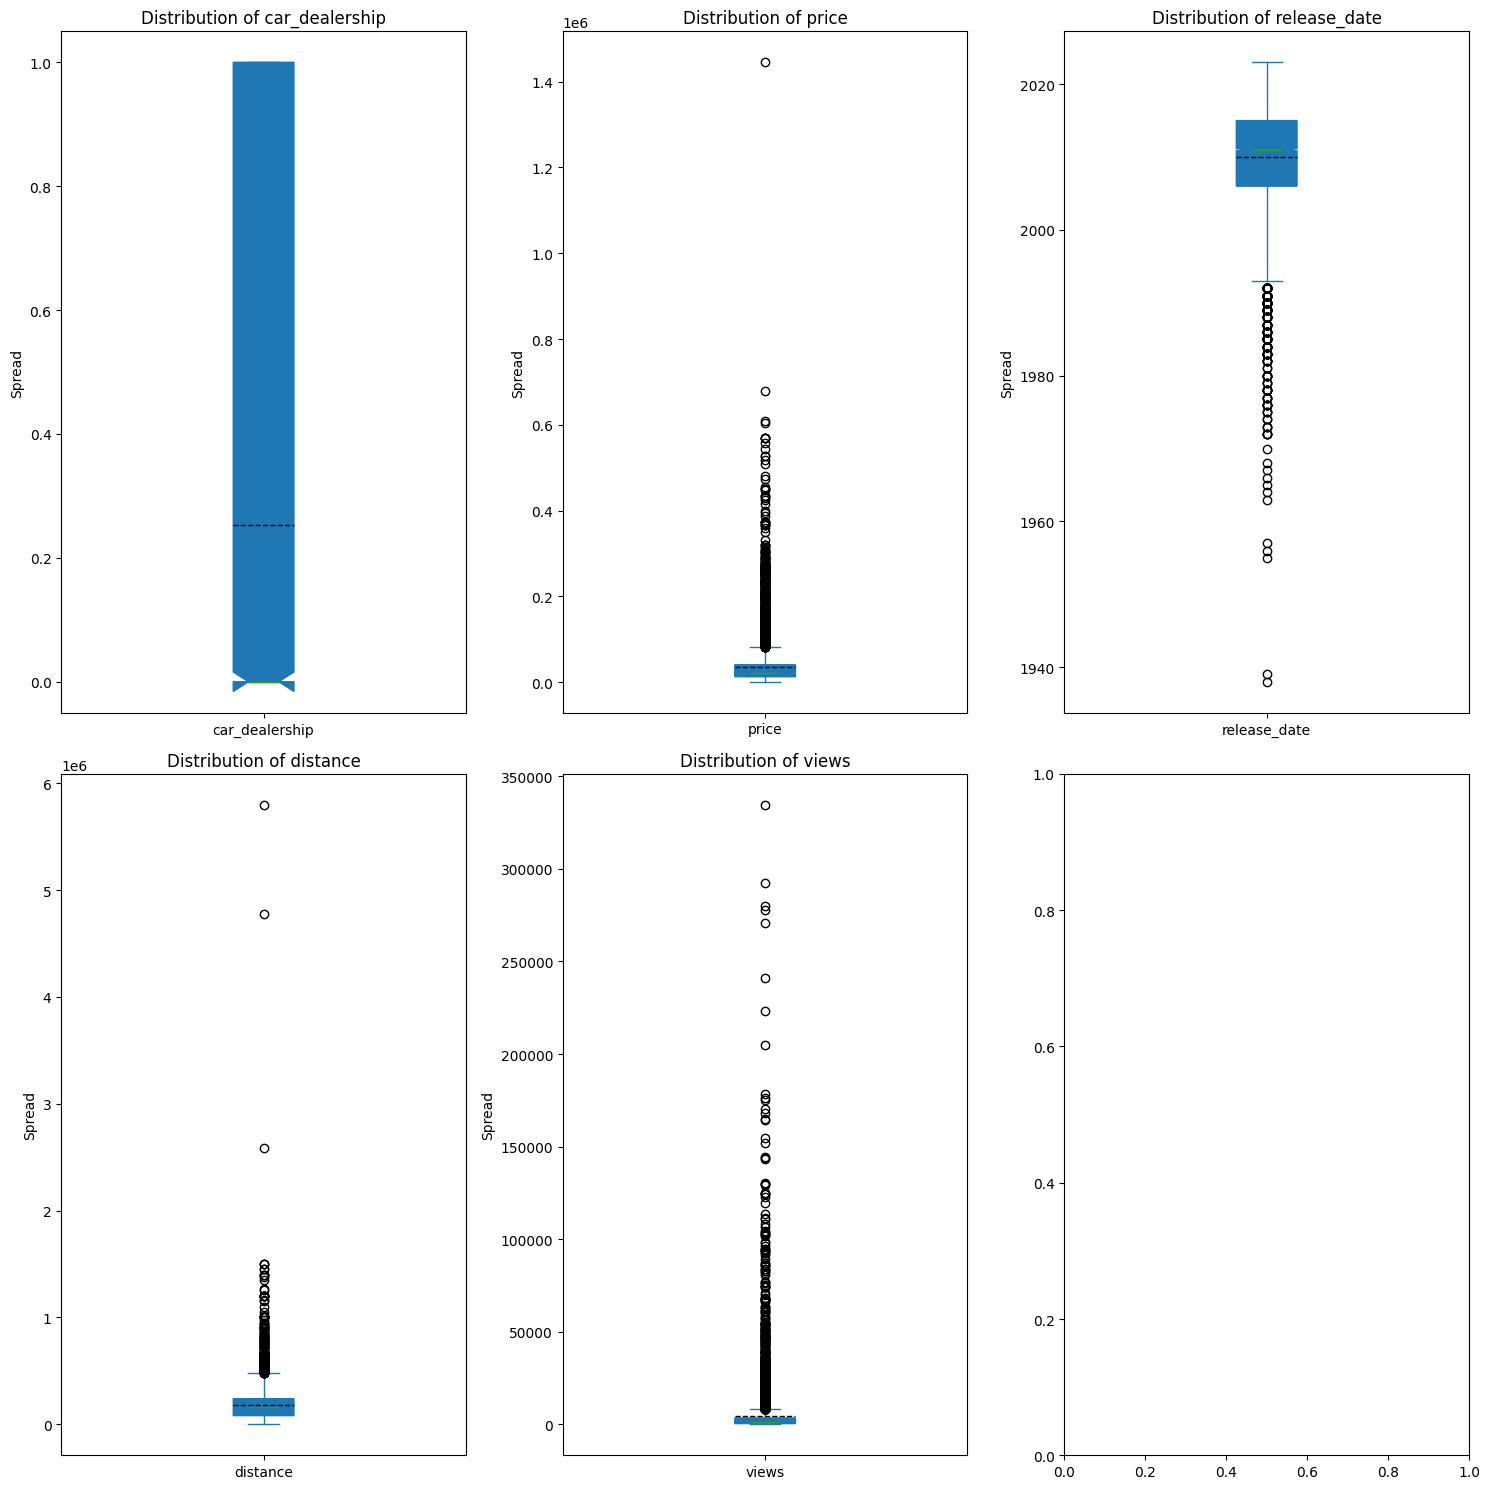

In [140]:
num_features = [i for i in df.columns if df[i].dtypes != 'object']
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()
for i,cols in enumerate(num_features):
    ax = axes[i]
    df_features[cols].plot(kind='box', notch=True, patch_artist=True, meanline=True, showmeans=True, meanprops=dict(color='black'),ax=ax)
    
    ax.set_ylabel('Spread')
    
    ax.set_title(f"Distribution of {cols}")
    
plt.tight_layout()
plt.show()


In [141]:
df_features["is_new"]=df_features["is_new"].replace({'Bəli':1, 'Xeyr':0})

C:\Users\Asus\AppData\Local\Temp\ipykernel_6644\3912304667.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features["is_new"]=df_features["is_new"].replace({'Bəli':1, 'Xeyr':0})


In [142]:
categorical_columns = df_features.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['city', 'brand', 'model', 'type_of_ban', 'color', 'gearbox', 'gear', 'owners', 'market', 'seats', 'fuel']


In [143]:
listt = []
for col in categorical_columns:
    dtypes = df_features[col].dtypes    
    nunique = df_features[col].nunique()
    sum_null = df_features[col].isnull().sum()    
    listt.append((dtypes, nunique, sum_null))
# Create a list of column names
column_names = ['dtypes', 'nunique', 'sum_null']
df = pd.DataFrame(listt, columns=column_names)
df.insert(0, 'column_names', categorical_columns)
df

,column_names,dtypes,nunique,sum_null
0,city,object,61,0
1,brand,object,111,0
2,model,object,893,0
3,type_of_ban,object,19,0
4,color,object,17,0
5,gearbox,object,4,0
6,gear,object,3,0
7,owners,object,5,0
8,market,object,8,0
9,seats,object,17,0


In [145]:
df_features["owners"].value_counts()

owners
1                6657
2                2282
0                 607
3                 373
4 və daha çox      81
Name: count, dtype: int64

In [146]:
df_features['owners'] = df_features["owners"].replace({"4 və daha çox":"5"})
df_features['owners']=df_features['owners'].astype(int)

In [147]:
train, test = train_test_split(df_features, test_size=0.2)

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9272 to 7419
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                8000 non-null   int64  
 1   price                         8000 non-null   float64
 2   city                          8000 non-null   object 
 3   brand                         8000 non-null   object 
 4   model                         8000 non-null   object 
 5   release_date                  8000 non-null   int64  
 6   type_of_ban                   8000 non-null   object 
 7   color                         8000 non-null   object 
 8   distance                      8000 non-null   int64  
 9   gearbox                       8000 non-null   object 
 10  gear                          8000 non-null   object 
 11  is_new                        8000 non-null   int64  
 12  views                         8000 non-null   int64  
 13  owner

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1640 to 1216
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                2000 non-null   int64  
 1   price                         2000 non-null   float64
 2   city                          2000 non-null   object 
 3   brand                         2000 non-null   object 
 4   model                         2000 non-null   object 
 5   release_date                  2000 non-null   int64  
 6   type_of_ban                   2000 non-null   object 
 7   color                         2000 non-null   object 
 8   distance                      2000 non-null   int64  
 9   gearbox                       2000 non-null   object 
 10  gear                          2000 non-null   object 
 11  is_new                        2000 non-null   int64  
 12  views                         2000 non-null   int64  
 13  owner

In [151]:
from sklearn import base
from sklearn.model_selection import KFold

In [152]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, colnames, targetName, n_fold=5, verbosity=True, discardOriginal_col=False):
        self.colnames = colnames if isinstance(colnames, list) else [colnames]
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits=self.n_fold, shuffle=False)
        
        for colname in self.colnames:
            col_mean_name = colname + '_Kfold_Target_Enc'
            X[col_mean_name] = np.nan
            
            for tr_ind, val_ind in kf.split(X):
                X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
                X.loc[X.index[val_ind], col_mean_name] = X_val[colname].map(
                    X_tr.groupby(colname)[self.targetName].mean()
                )
            X.fillna({col_mean_name:mean_of_target}, inplace=True)

            if self.verbosity:
                encoded_feature = X[col_mean_name].values
                print('Correlation between the new feature, {} and {} is {}.'.format(
                    col_mean_name, self.targetName, np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]
                ))

        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)

        return X

In [154]:
targetc = KFoldTargetEncoderTrain(['city', 'brand', 'model', 'type_of_ban', 'color', 'fuel', 'market', 'gear', 'gearbox'],'price',n_fold=5)
new_train = targetc.fit_transform(train)

Correlation between the new feature, city_Kfold_Target_Enc and price is 0.19557546456960542.
Correlation between the new feature, brand_Kfold_Target_Enc and price is 0.5326101292447213.
Correlation between the new feature, model_Kfold_Target_Enc and price is 0.7568576684868873.
Correlation between the new feature, type_of_ban_Kfold_Target_Enc and price is 0.3725798815970318.
Correlation between the new feature, color_Kfold_Target_Enc and price is 0.2663745279597991.
Correlation between the new feature, fuel_Kfold_Target_Enc and price is 0.16475038879221773.
Correlation between the new feature, market_Kfold_Target_Enc and price is 0.3541618785977866.
Correlation between the new feature, gear_Kfold_Target_Enc and price is 0.4145353928752666.
Correlation between the new feature, gearbox_Kfold_Target_Enc and price is 0.2801972343632432.


In [155]:
test_targetc = KFoldTargetEncoderTrain(['city', 'brand', 'model', 'type_of_ban', 'color', 'fuel', 'market', 'gear', 'gearbox'],'price',n_fold=5)
new_test = test_targetc.fit_transform(test)

Correlation between the new feature, city_Kfold_Target_Enc and price is 0.21811990662590514.
Correlation between the new feature, brand_Kfold_Target_Enc and price is 0.5042872508955133.
Correlation between the new feature, model_Kfold_Target_Enc and price is 0.7246518599085939.
Correlation between the new feature, type_of_ban_Kfold_Target_Enc and price is 0.4092861421202559.
Correlation between the new feature, color_Kfold_Target_Enc and price is 0.24542198534564122.
Correlation between the new feature, fuel_Kfold_Target_Enc and price is 0.1594670138661595.
Correlation between the new feature, market_Kfold_Target_Enc and price is 0.36618507212976353.
Correlation between the new feature, gear_Kfold_Target_Enc and price is 0.4517887376530519.
Correlation between the new feature, gearbox_Kfold_Target_Enc and price is 0.29125212432338704.


In [156]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9272 to 7419
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                8000 non-null   int64  
 1   price                         8000 non-null   float64
 2   city                          8000 non-null   object 
 3   brand                         8000 non-null   object 
 4   model                         8000 non-null   object 
 5   release_date                  8000 non-null   int64  
 6   type_of_ban                   8000 non-null   object 
 7   color                         8000 non-null   object 
 8   distance                      8000 non-null   int64  
 9   gearbox                       8000 non-null   object 
 10  gear                          8000 non-null   object 
 11  is_new                        8000 non-null   int64  
 12  views                         8000 non-null   int64  
 13  owner

In [157]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1640 to 1216
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                2000 non-null   int64  
 1   price                         2000 non-null   float64
 2   city                          2000 non-null   object 
 3   brand                         2000 non-null   object 
 4   model                         2000 non-null   object 
 5   release_date                  2000 non-null   int64  
 6   type_of_ban                   2000 non-null   object 
 7   color                         2000 non-null   object 
 8   distance                      2000 non-null   int64  
 9   gearbox                       2000 non-null   object 
 10  gear                          2000 non-null   object 
 11  is_new                        2000 non-null   int64  
 12  views                         2000 non-null   int64  
 13  owner

In [158]:
y_train = new_train["price"]
X_train = new_train.drop(columns ='price')
X_test = new_test.drop(columns ='price')
y_test = new_test['price']

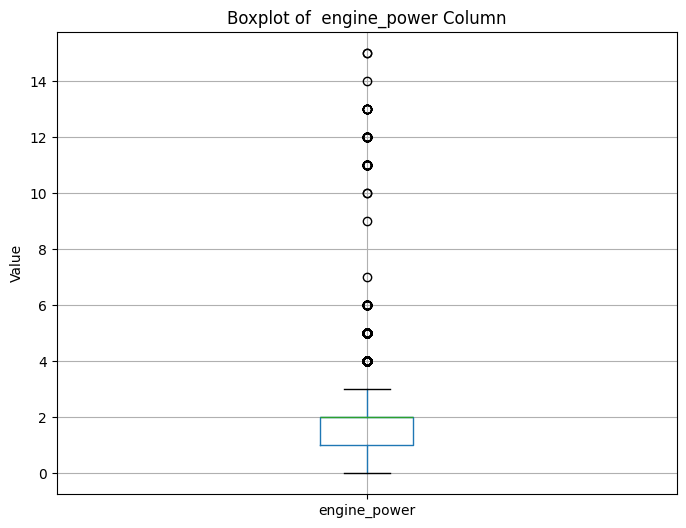

In [159]:
plt.figure(figsize=(8, 6))
X_train.boxplot(column='engine_power')
plt.title('Boxplot of  engine_power Column')
plt.ylabel('Value')
plt.show()

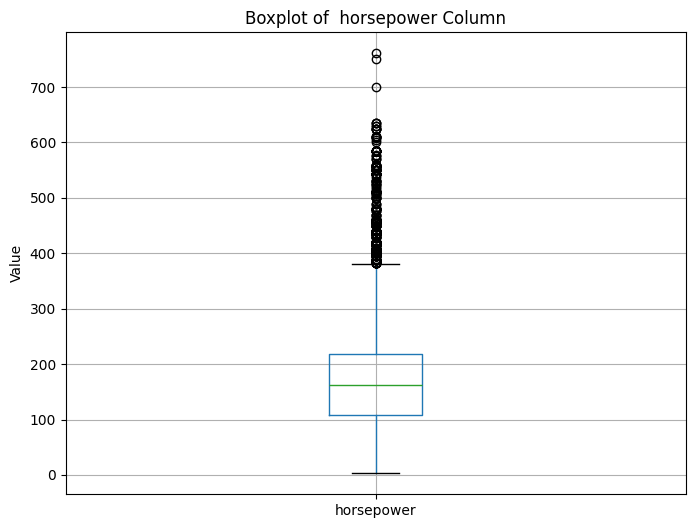

In [160]:
plt.figure(figsize=(8, 6))
X_train.boxplot(column='horsepower')
plt.title('Boxplot of  horsepower Column')
plt.ylabel('Value')
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler,RobustScaler
outlier_columns = ['release_date',"distance","views","seats","engine_power","horsepower"]
RobustScaler = RobustScaler()
X_train[outlier_columns]=RobustScaler.fit_transform(X_train[outlier_columns])
X_test[outlier_columns]=RobustScaler.transform(X_test[outlier_columns])

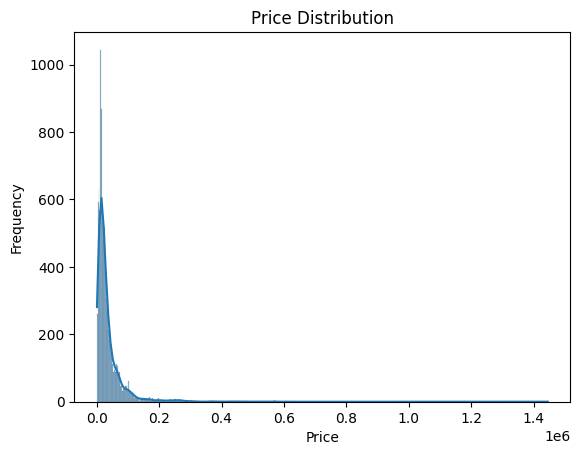

In [163]:
sns.histplot(df_features['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [165]:
from scipy.stats import skew
skewness_value = skew(df_features['price'])
print(f'Skewness: {skewness_value}')

Skewness: 6.368774013395517


In [166]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

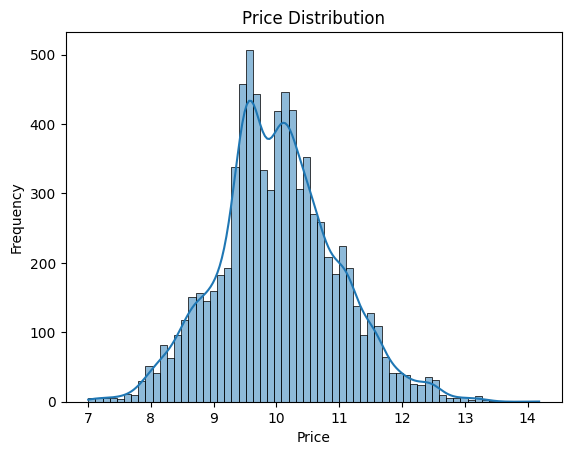

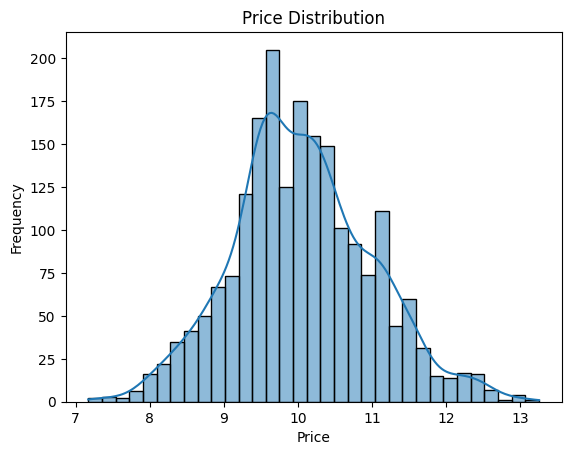

In [168]:
for i in [y_train_log,y_test_log]:
    sns.histplot(i, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

In [169]:
standart_columns = ["day","month","year"]
StandardScaler = StandardScaler()
X_train[standart_columns]=StandardScaler.fit_transform(X_train[standart_columns])
X_test[standart_columns]=StandardScaler.transform(X_test[standart_columns])

### Removing categorical columns

In [170]:
X_train.drop(columns={"city",'brand','model','type_of_ban','color','gearbox','gear','fuel','market'},inplace=True)
X_test.drop(columns={"city",'brand','model','type_of_ban','color','gearbox','gear','fuel','market'},inplace=True)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [187]:
lr = LinearRegression()
lr.fit(X_train, y_train_log)
y_pred1 = lr.predict(X_test)

In [188]:
mse1 = mean_squared_error(y_test_log, y_pred1)
mae1 = mean_absolute_error(y_test_log, y_pred1)
r2_1 = r2_score(y_test_log, y_pred1)
print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print(f'R^2 Score: {r2_1}')
print("Predictions:", y_pred1[:5])
print("True Values:", y_test_log[:5].values)

Mean Absolute Error: 0.25028883461544926
Mean Squared Error: 0.12246651930080853
R^2 Score: 0.8608017765977778
Predictions: [11.24462169 11.04402337  8.94209531 11.5086613   9.39619953]
True Values: [11.29911324 10.9241383   8.93590353 12.62521052  9.04782144]


### RandomForestRegressor

In [189]:
random_forest= RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train_log)
y_pred2 = random_forest.predict(X_test)


In [191]:
mse2 = mean_squared_error(y_test_log, y_pred2)
mae2 = mean_absolute_error(y_test_log, y_pred2)
r2_2 = r2_score(y_test_log, y_pred2)
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print(f'R^2 Score: {r2_2}')
print("Predictions:", y_pred2[:5])
print("True Values:", y_test_log[:5].values)


Mean Squared Error: 0.06588988296704558
Mean Absolute Error: 0.16521998143430958
R^2 Score: 0.9251080646240549
Predictions: [11.460119   11.00343212  8.6371556  11.92421201  8.93609345]
True Values: [11.29911324 10.9241383   8.93590353 12.62521052  9.04782144]


<Axes: xlabel='price', ylabel='Density'>

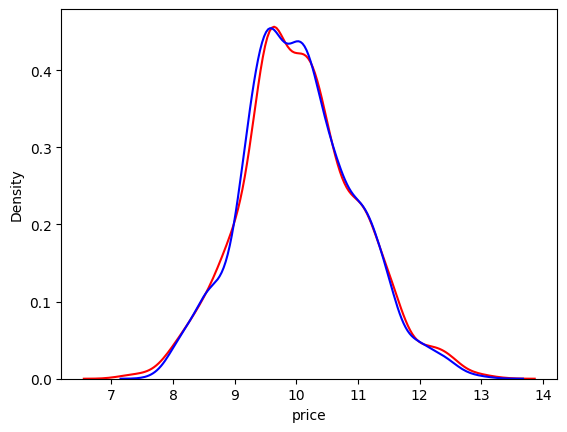

In [193]:
sns.kdeplot(data=y_test_log,color="red")
sns.kdeplot(data=y_pred2,color="blue")

In [194]:
y_pred3 = random_forest.predict(X_train)
r2_2 = r2_score(y_train_log, y_pred3)
print(f'R^2 Score: {r2_2}')

R^2 Score: 0.9925923264954074


### We have to add regularization

In [195]:
random_forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=10, 
    min_samples_split=5,  
    min_samples_leaf=2,  
    max_features='sqrt',  
    random_state=42
)
random_forest.fit(X_train, y_train_log)
y_pred_reg = random_forest.predict(X_test)

### For test

In [196]:
mse_reg_test = mean_squared_error(y_test_log, y_pred_reg)
mae_reg_test = mean_absolute_error(y_test_log, y_pred_reg)
r2_reg_test = r2_score(y_test_log, y_pred_reg)
print("Mean Squared Error:", mse_reg_test)
print("Mean Absolute Error:", mae_reg_test)
print(f'R^2 Score: {r2_reg_test}')
print("Predictions:", y_pred_reg[:5])
print("True Values:", y_test_log[:5].values)

Mean Squared Error: 0.07467557071056038
Mean Absolute Error: 0.18793946697063202
R^2 Score: 0.9151220526736371
Predictions: [11.36638226 10.97693636  8.60451433 11.93046456  8.92652253]
True Values: [11.29911324 10.9241383   8.93590353 12.62521052  9.04782144]


### For train

In [197]:
y_pred_reg_train = random_forest.predict(X_train)

In [198]:
mse_reg_train = mean_squared_error(y_train_log, y_pred_reg_train)
mae_reg_train = mean_absolute_error(y_train_log, y_pred_reg_train)
r2_reg_train = r2_score(y_train_log, y_pred_reg_train)
print("Mean Squared Error:", mse_reg_train)
print("Mean Absolute Error:", mae_reg_train)
print(f'R^2 Score: {r2_reg_train}')
print("Predictions:", y_pred_reg_train[:5])
print("True Values:", y_train_log[:5].values)

Mean Squared Error: 0.03950493629183724
Mean Absolute Error: 0.1381504826003673
R^2 Score: 0.955792843809139
Predictions: [10.08047824 10.2468043  10.00909381  9.90583231 10.16719837]
True Values: [10.0647557  10.15812977 10.01234196  9.6485953  10.11455852]


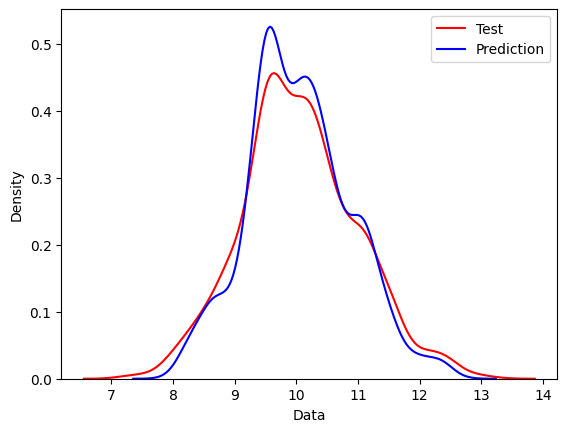

In [201]:
sns.kdeplot(data=y_test_log, color="red", label="Test")
sns.kdeplot(data=y_pred_reg, color="blue", label="Prediction")

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()